<a href="https://colab.research.google.com/github/Leo-Lifeblood/Projects/blob/main/DQN_Sudoku_learner_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sudokutools
import sudokutools
from sudokutools.sudoku import Sudoku
from sudokutools.generate import generate
import numpy as np
from string import whitespace
from sudokutools.solve import dlx
from sudokutools.solve import init_candidates
from IPython.display import clear_output

  Preparing metadata (setup.py) ... done
  Created wheel for sudokutools: filename=sudokutools-0.4.0-py3-none-any.whl size=35041 sha256=b69bd1a0670982b37e0d0571aa1f70a8681a95facc70beb5f2dde21659035267
  Stored in directory: /root/.cache/pip/wheels/01/81/fb/487eb992db99c056912da7f7d0dcba7e8d310823a11c258160
Successfully built sudokutools


In [ ]:
s = generate(symmetry=None, min_count=40)
s = WorkableSudoku.decode(s.encode(), base_layer=True)
print(s)
print(s.solution)
print(s.valid_moves)
#print(WorkableSudoku.decode(s.encode()))
#print()
#print(WorkableSudoku.decode(dlx(s).__next__().encode()))

      |     9 |   3  
8 2   | 5   1 |     6
      | 7 8 3 |   2 1
------+-------+------
3 8   | 2     | 1 6 4
5 9   |     6 |   8 7
1 4   |   7 8 | 5   2
------+-------+------
6   8 |       |   4  
  3   | 1 6 4 |      
    4 | 8 3 7 |      
4 7 1 | 6 2 9 | 8 3 5
8 2 3 | 5 4 1 | 9 7 6
9 6 5 | 7 8 3 | 4 2 1
------+-------+------
3 8 7 | 2 9 5 | 1 6 4
5 9 2 | 4 1 6 | 3 8 7
1 4 6 | 3 7 8 | 5 9 2
------+-------+------
6 1 8 | 9 5 2 | 7 4 3
7 3 9 | 1 6 4 | 2 5 8
2 5 4 | 8 3 7 | 6 1 9
[[[0 0 1 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 1 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 1 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 1 0]]

 [[0 0 0 0 1 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 1 0 0 0]
  [0 0 0 0 0 0 1 0 0]
  [1 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 1 0 0]
  [0 0

In [ ]:

class WorkableSudoku(Sudoku):
    def __init__(self, box_size=(3, 3), base_layer=True):
        super().__init__()  # Call the original constructor
        # Now, manually set box_size and related attributes
        self.box_size = tuple(box_size)
        self.box_width, self.box_height = box_size
        self.indices = tuple(range(box_size[0] * box_size[1]))
        self.numbers = tuple(range(1, box_size[0] * box_size[1] + 1))

        # Initialize other attributes based on box_size
        self.__numbers = [[0] * len(self.indices) for _ in self.indices]
        self.__candidates = [[frozenset()] * len(self.indices) for _ in self.indices]

        if base_layer:
          generator = dlx(self)
          try:
            self.solution = generator.__next__().encode()
            self.solution = WorkableSudoku.decode(self.solution, base_layer=False)
            #print(self.solution)
            #print(self.solution.string_to_one_hot())

          except IndexError:
            self.solution = None
        else:
          self.solution = None

        init_candidates(self)

        self.state = self.make_state()

        if self.solution is not None:
          self.valid_moves = np.clip(self.solution.string_to_one_hot() - self.string_to_one_hot(),0,2)

    def set_candidates(self, row, col, value):
        """Set the candidates of the field at (row, col) to value.

        Args:
            row (int): The row of the field.
            col (int): The column of the field.
            value (iterable): The candidates to set the field to.
        """

        self.__candidates[row][col] = frozenset(value)

    def return_candidates(self):
        return self.__candidates

    def update_state(self):
      self.state = self.make_state()
      return self.state

    def update_solution(self):
      generator = dlx(self)
      try:
        self.solution = WorkableSudoku.decode(generator.__next__().encode(), base_layer=False)
      except (IndexError, StopIteration):
        self.solution = WorkableSudoku()

      self.valid_moves = np.clip(self.solution.string_to_one_hot() - self.string_to_one_hot(), 0,2)

    def string_to_one_hot(self):
      f = self.encode()
      original_array = np.array(list(f)).reshape(9,9).astype(int)
      original_array

      # Create an identity matrix for one-hot encoding of digits 1 to 9
      eye_matrix = np.eye(9, dtype=int)

      # Use advanced indexing to create the one-hot encoded array
      # Subtract 1 from non-zero entries to use them as indices (1 maps to index 0, ..., 9 maps to index 8)
      one_hot_array = eye_matrix[original_array - 1]

      # Replace any negative indices (from the '0's) with a zero array
      one_hot_array[original_array == 0] = 0

      # Reshape to 9x9x9 to match the desired output
      one_hot_array = one_hot_array.reshape(9, 9, 9)

      return one_hot_array.transpose((2, 0, 1))

    def candidates_to_one_hot(self):
      one_hot_array = np.zeros((9, 9, 9), dtype=int)

      # Populate the one-hot array based on the frozensets
      for i in range(9):
          for j in range(9):
              for digit in self.__candidates[i][j]:
                  one_hot_array[i, j, digit - 1] = 1  # Set to 1 for each digit in the frozenset

      return one_hot_array.transpose((2, 0, 1))

    def make_state(self):
      numbers_onehot = self.string_to_one_hot()
      candidates_onehot = self.candidates_to_one_hot()
      return np.concatenate((numbers_onehot, candidates_onehot), axis=0)

    @classmethod
    def decode(cls, s, empty="0", number_sep=None, sudoku_sep="|", candidate_sep=",", box_size=None, base_layer=True):
        """Create a new sudoku from the string s.

        Args:
            s (str):              A string representing the sudoku (see below).
            empty (char):         A character representing empty fields.
            sudoku_sep (char):    A character, which separates field information
                                  from candidate information.
            candidate_sep (char): A character separating the candidate lists.
            box_size (int, int): box_width and box_height of the new sudoku.
                                 If not provided this will be calculated
                                 automatically, which may lead to wrong results.
                                 (It will always work as intended if width ==
                                 height.)

        Returns:
            Sudoku: The newly created sudoku.

        Examples for s:
            000030000005009602008004013020060000703040106000080090210300800306800700000020000
            000030000005009602008004013020060000703040106000080090210300800306800700000020000|124,235

        Whitespace is ignored while parsing the string, so you can place
        newlines for better readability.

        Each number represents the value of a column. If a row is full, we
        continue in the next one. So the sudoku above looks like this::

                  |   3   |
                5 |     9 | 6   2
                8 |     4 |   1 3
            ------+-------+------
              2   |   6   |
            7   3 |   4   | 1   6
                  |   8   |   9
            ------+-------+------
            2 1   | 3     | 8
            3   6 | 8     | 7
                  |   2   |

        The second string additionally defines candidates. Each set
        of candidates is separated by ',' so the string above defines the
        candidates for (0, 0) to be 1, 2 and 4 and for (0, 1) to be 2, 3 and 5

        This is the default format, which encode() uses and no other
        format is supported right now.
        """
        # remove leading and trailing whitespace
        s = s.strip()

        # remove all unused whitespace
        if number_sep is None:
            special = empty + sudoku_sep + candidate_sep
        else:
            special = empty + sudoku_sep + candidate_sep + number_sep

        for c in whitespace:
            if c not in special:
                if number_sep:
                    s = s.replace(c, number_sep)
                else:
                    s = s.replace(c, "")

        if sudoku_sep in s:
            sudoku_str, candidate_str = s.split(sudoku_sep, 1)
        else:
            sudoku_str = s
            candidate_str = ""

        # try to get size automatically:
        if box_size is None:
            if number_sep:
                count = len(sudoku_str.split(number_sep))
            else:
                count = len(sudoku_str)

            length = count**0.5

            if not length.is_integer():
                raise ValueError("Invalid number of fields given " +
                                 "(must be square number): %d" % count)

            length = int(length)
            width = length**0.5
            if width.is_integer():
                box_size = int(width), int(width)
            else:
                for i in range(2, length+1):
                    if length % i == 0:
                        width = i
                        break
                if width == length:
                    raise ValueError("Invalid row length: %d" % length)
                box_size = (width, length // width)

        # read sudoku fields
        sudoku = WorkableSudoku(box_size=box_size, base_layer=base_layer)
        col = 0
        row = 0

        if number_sep:
            items = sudoku_str.split(number_sep)
        else:
            items = sudoku_str

        for item in items:
            if item is empty:
                sudoku[row, col] = 0
            else:
                sudoku[row, col] = int(item)

            col += 1
            if col >= sudoku.box_width * sudoku.box_height:
                row += 1
                col = 0
            if row >= sudoku.box_width * sudoku.box_height:
                break

        # read candidates if any
        if not candidate_str:
            if base_layer:
              sudoku.update_solution()
            return sudoku

        col = 0
        row = 0

        for c in candidate_str.split(candidate_sep):
            c = c.strip()
            if number_sep:
                candidates = [int(item) for item in c.split(number_sep)]
            else:
                candidates = [int(item) for item in c]
            sudoku.set_candidates(row, col, candidates)
            col += 1
            if col == sudoku.box_width * sudoku.box_height:
                col = 0
                row += 1
            if row == sudoku.box_width * sudoku.box_height:
                break
        if base_layer:
          sudoku.update_solution()
        return sudoku

class SudokuEnv:
  def __init__(self):

    self.sudoku = None

  def reset(self):
    s = generate(symmetry=None, min_count=random.randint(18, 80))
    f = s.encode()
    self.sudoku = WorkableSudoku.decode(f)
    self.sudoku.update_solution()
    init_candidates(self.sudoku)
    return self.sudoku.update_state(), False

  def step(self, action):
    x = action // 81
    y = (action % 81) // 9
    z = action % 9

    """
    print(self.sudoku.valid_moves)
    print(x,y,z)
    print(self.sudoku.valid_moves[x,y,z])
    """
    if self.sudoku.valid_moves[x,y,z] == 1:
      #print("reached")
      self.sudoku.set_number(y,z,x+1)
      #print("what")
      self.sudoku.update_solution()
      init_candidates(self.sudoku)
      return self.sudoku.update_state(), 1, False
    else:
      return self.sudoku.state, 0, True

  def render(self):
    print(self.sudoku)



In [ ]:
env = SudokuEnv()

In [ ]:
state, done = env.reset()
state

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 1, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 1, 1, 1],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 1, 0]],

       [[1, 0, 1, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 1, 0, 1],
        ...,
        [0, 0, 0, ..., 

In [ ]:
print(env.sudoku)

  2   |       |   3 4
      | 8 7 3 |     2
    9 |   4   |      
------+-------+------
      |   3   | 6 9  
  9 6 | 4     |   2  
    3 |   8   |      
------+-------+------
7     | 5     |   8  
      |   9 7 |      
    2 |       |     6


In [ ]:
print(env.sudoku.solution)

5 2 7 | 1 6 9 | 8 3 4
6 1 4 | 8 7 3 | 9 5 2
3 8 9 | 2 4 5 | 1 6 7
------+-------+------
1 4 5 | 7 3 2 | 6 9 8
8 9 6 | 4 5 1 | 7 2 3
2 7 3 | 9 8 6 | 5 4 1
------+-------+------
7 6 1 | 5 2 4 | 3 8 9
4 3 8 | 6 9 7 | 2 1 5
9 5 2 | 3 1 8 | 4 7 6


In [ ]:
print(env.sudoku)
env.sudoku.string_to_one_hot()

  2   |       |   3 4
      | 8 7 3 |     2
    9 |   4   |      
------+-------+------
      |   3   | 6 9  
  9 6 | 4     |   2  
    3 |   8   |      
------+-------+------
7     | 5     |   8  
      |   9 7 |      
    2 |       |     6


array([[[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
action = 81*0  + 9*0 + 3
x = action // 81
y = (action % 81) // 9
z = action % 9



x, y, z

(0, 0, 3)

In [ ]:
env.sudoku.valid_moves,env.sudoku.valid_moves[0, 0, 3]

(array([[[0, 0, 0, 1, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 0]],
 
        [[0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0]],
 
        [[0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0],
      

In [ ]:
print(env.sudoku)

  2   |       |   3 4
      | 8 7 3 |     2
    9 |   4   |      
------+-------+------
      |   3   | 6 9  
  9 6 | 4     |   2  
    3 |   8   |      
------+-------+------
7     | 5     |   8  
      |   9 7 |      
    2 |       |     6


In [ ]:
state, reward, done = env.step(81*0 + 9*0 + 3)

[[[0 0 0 1 0 0 0 0 0]
  [0 1 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 1 0 0]
  [1 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0 0 1]
  [0 0 1 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 1 0]
  [0 0 0 0 1 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0 0 0]
  [0 0 0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0]
  [0 0 0 0 1 0 0 0 0]
  [0 0 0 0 0 0 1 0 0]
  [0 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 1 0 0]
  [0 1 0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 1 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 1 0]
  [0 0 0 0 0 1 0 0 0]
  [1 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 1 0 0]]

 [[1 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 1 0]
  [0 0 0 0 0 1 0 0 0]
  [0 0 1 0 0 0 0 0 0]
  [0 0 0 0 1 0 0 0 0]
  [0 0 0 0 0 0 1 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 1]
  [0 1 0 0 0 0 0 0 0]]



In [ ]:
print(env.sudoku)

  2   | 1     |   3 4
      | 8 7 3 |     2
    9 |   4   |      
------+-------+------
      |   3   | 6 9  
  9 6 | 4     |   2  
    3 |   8   |      
------+-------+------
7     | 5     |   8  
      |   9 7 |      
    2 |       |     6


In [ ]:
env.sudoku.set_number(0, 3, 1)

In [ ]:
print(env.sudoku)

2 7 9 | 1 1 4 | 5 6 3
4 3 8 | 2 5 6 | 9   1
5 1 6 | 3 9 7 |   4 2
------+-------+------
7 2 5 | 9 4 3 | 6 1 8
  9   | 8 6 1 | 7 2  
8 6   | 5 7 2 | 4    
------+-------+------
1 5 7 |   3 8 | 2 9 4
9 4 2 |   1 5 | 3 8 6
6 8   | 4 2 9 | 1 5  


In [ ]:
env.sudoku.valid_moves

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0

In [ ]:
env.sudoku.set_number(0, 2, 1)

In [ ]:
print(env.sudoku)

9   1 |     5 |     6
    8 |   9 1 |   7  
  6   |     4 |   9 2
------+-------+------
  4   |       | 2   1
    7 |   1 2 | 6    
  9   |   6   |      
------+-------+------
    3 |       |     7
    9 | 5 7   |     8
  8   |       |     5


In [ ]:
reward, done

(0, True)

In [ ]:
env.sudoku.update_solution()

In [ ]:
env.sudoku.string_to_one_hot()

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
env.sudoku.valid_moves,env.sudoku.valid_moves[0, 0, 7]

(array([[[0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 0]],
 
        [[0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0, 0]],
 
        [[0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0],
      

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from collections import deque
import random

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')
torch.set_default_device(device)

Using cuda device


In [ ]:
class ReplayBuffer(deque):
    def __init__(self, maxlen=None):
      if maxlen is None:
        super(ReplayBuffer, self).__init__()
      else:
        super(ReplayBuffer, self).__init__(maxlen=maxlen)

      self.len = 0

    def add_experience(self, old_state, action, reward, new_state, done):
        super(ReplayBuffer, self).append([old_state, action, reward, new_state, done])
        self.len += 1
        self.len = min(self.len, self.maxlen)

    def sample(self, batch_size):
        sample = [self[i] for i in random.sample(range(len(self)), min(batch_size, len(self)))]
        old_states, actions, rewards, new_states, dones = zip(*sample)
        return torch.tensor(old_states).float(), torch.tensor(actions).long(), torch.tensor(rewards).float(), torch.tensor(new_states).float(), torch.tensor(dones).float()

    def __len__(self):
        return self.len

In [ ]:
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResNetBlock, self).__init__()
        # First convolutional layer in the block
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

        # Second convolutional layer in the block
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Downsample layer to match dimensions (if needed)
        self.downsample = downsample

    def forward(self, x):
        # Save the input tensor for residual connection
        identity = x

        # First convolution + batchnorm + relu
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        # Second convolution + batchnorm
        out = self.conv2(out)
        out = self.bn2(out)

        # Apply downsample if defined
        if self.downsample is not None:
            identity = self.downsample(x)

        # Add the original input (identity) to the output
        out += identity
        out = self.relu(out)

        return out

class FFN(nn.Module):
  def __init__(self, hidden_dim):
    super(FFN, self).__init__()
    self.norm = nn.LazyBatchNorm1d()
    self.fc1 = nn.LazyLinear(hidden_dim*4)
    self.activation = nn.Mish()
    self.fc2 = nn.Linear(hidden_dim*4, hidden_dim)

  def forward(self, x):
    x2 = self.norm(x)
    x2 = self.fc1(x2)
    x2 = self.activation(x2)
    x2 = self.fc2(x2)
    return x + x2

class SudokuNet(nn.Module):
    def __init__(self, num_blocks=3, num_channels=64):
        super(SudokuNet, self).__init__()
        self.convinitial = nn.Conv2d(18, num_channels, kernel_size=3, padding=1)
        self.res_blocks = nn.ModuleList([ResNetBlock(num_channels, num_channels) for _ in range(num_blocks)])
        self.conv_out = nn.Conv2d(num_channels, 9, kernel_size=1)
        self.value_head = nn.Linear(num_channels * 9 * 9, 1)


    def forward(self, x):
        x = self.convinitial(x)
        for block in self.res_blocks:
            x = block(x)
        v = self.value_head(torch.flatten(x))
        x = self.conv_out(x)
        a = torch.flatten(x)

        q = v + (a - a.mean())
        return q

In [ ]:
model = SudokuNet()

In [ ]:
model(torch.tensor(np.expand_dims(state, axis=0)).float()).shape

torch.Size([729])

In [ ]:
class DQN(nn.Module):
  def __init__(self, num_blocks=3, num_channels=64, batch_size = 32, memory_size=10000, clipnorm = 0.001, tau = 0.95, gamma=0.99, accumulation_steps=1, soft_update_freq=4):
    super(DQN, self).__init__()
    self.memory = ReplayBuffer(memory_size)

    self.num_blocks=num_blocks
    self.num_channels=num_channels

    self.convinitial = nn.Conv2d(18, num_channels, kernel_size=3, padding=1)
    self.res_blocks = nn.ModuleList([ResNetBlock(num_channels, num_channels) for _ in range(num_blocks)])
    self.conv_out = nn.Conv2d(num_channels, 9, kernel_size=1)
    self.value_head = nn.Linear(num_channels * 9 * 9, 1)
    #maybe add a few linear layers # bad idea

    self.accumulation_steps = accumulation_steps
    self.accumulation_counter = 0
    self.clipnorm = clipnorm
    self.tau = tau
    self.gamma = gamma
    self.soft_update_freq = soft_update_freq
    self.soft_update_counter = 0

    self.batch_size = batch_size

    self.optimizer = None
    self.Target = None

  def forward(self, x):
    x = x.float()
    x = self.convinitial(x)
    for block in self.res_blocks:
        x = block(x)
    v = self.value_head(torch.flatten(x,start_dim=1))
    x = self.conv_out(x)
    a = torch.flatten(x,start_dim=1)

    q = v + (a - a.mean())
    return q

  def predict(self, x):
    self.eval()
    with torch.no_grad():
      values = self(x)
    self.train()
    return values

  def add_experience(self, old_state, action, reward, new_state, done):
    self.memory.add_experience(old_state, action, reward, new_state, done)

  def make_optimizer(self, lr=3e-4):
    self.optimizer = optim.Adam(self.parameters(), lr=lr)

  def make_target(self):
    state = self.state_dict()
    self.Target = DQN(num_blocks = self.num_blocks, num_channels=self.num_channels)
    self.Target.load_state_dict(state)

  def update_target(self):
    state = self.state_dict()
    filtered_state = {k: v for k, v in state.items() if k in self.Target.state_dict()}
    updated = {}
    for k, v in filtered_state.items():
      updated[k] = (1-self.tau) * v + self.Target.state_dict()[k] * self.tau
    self.Target.load_state_dict(updated)


  def training_step(self):
    old_states, actions, rewards, new_states, dones = self.memory.sample(self.batch_size)
    if old_states.shape[0] < self.batch_size:
      return 0

    if self.optimizer is None:
      self.make_optimizer()
    if self.Target is None:
      self.make_target()

    if self.accumulation_counter == 0:
      self.optimizer.zero_grad()

    if self.soft_update_counter >= self.soft_update_freq:
      self.update_target()
      self.soft_update_counter = 0

    with torch.no_grad():
      target_values = torch.max(self.Target(new_states), dim=-1).values
      target_values = rewards + self.gamma * target_values * (1 - dones)

    values = self(old_states).gather(-1, actions.unsqueeze(1))

    target_values = target_values.unsqueeze(1)


    loss = F.mse_loss(values, target_values)
    loss.backward()
    self.accumulation_counter += 1

    if self.accumulation_counter >= self.accumulation_steps:
      torch.nn.utils.clip_grad_norm_(self.parameters(), self.clipnorm)
      self.optimizer.step()
      self.accumulation_counter = 0
      self.soft_update_counter += 1
    return loss.item()





In [ ]:
sudokunet = DQN(num_blocks=5, num_channels=96, batch_size=128, memory_size=50000)

In [ ]:
sudokunet(torch.tensor(obs).unsqueeze(0)).shape

NameError: name 'obs' is not defined

In [ ]:
env = SudokuEnv()

In [ ]:
rewards = []

In [ ]:
epsilon = 1
max_time = 1000

#rewards = []
display_freq = 1

while True:
  obs, _ = env.reset()
  done = False
  total_reward = 0
  time = 0
  while (not done) and (time <= max_time):
    if epsilon > random.random():
      action = random.randint(0, 728)
    else:
      action = sudokunet.predict(torch.tensor(obs).unsqueeze(0)).argmax().item()
    new_obs, reward, done = env.step(action)
    #reward = - reward
    sudokunet.add_experience(obs, action, reward, new_obs, int(done))
    obs = new_obs
    total_reward += reward
    time += 1
    loss = sudokunet.training_step()

  rewards.append(total_reward)
  epsilon = max(epsilon*0.995, 0.01)
  #print(total_reward, loss, epsilon)
  print(epsilon)
  if len(rewards) % display_freq == 0:
      plt.plot(rewards)
      plt.show()
      clear_output(wait=True)

0.7183288830986236


KeyboardInterrupt: 

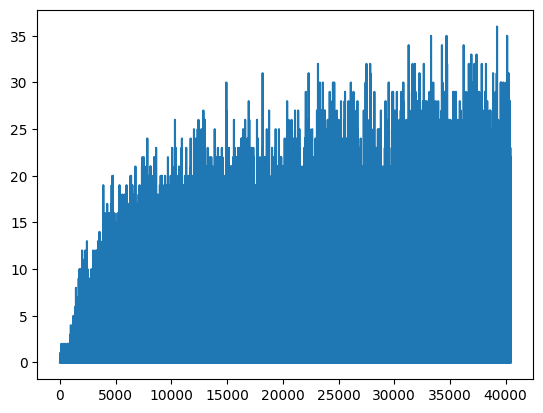

In [ ]:
epsilon = 1
max_time = 1000
#rewards = []
display_freq = 1

try:
    while True:
        obs, _ = env.reset()
        done = False
        total_reward = 0
        time = 0
        while (not done) and (time <= max_time):
            if epsilon > random.random():
                action = random.randint(0, 728)
            else:
                action = sudokunet.predict(torch.tensor(obs).unsqueeze(0)).argmax().item()
            new_obs, reward, done = env.step(action)
            sudokunet.add_experience(obs, action, reward, new_obs, int(done))
            obs = new_obs
            total_reward += reward
            time += 1
            loss = sudokunet.training_step()

        rewards.append(total_reward)
        epsilon = max(epsilon*0.9985, 0.00001)
        print(epsilon)
        if len(rewards) % display_freq == 0:
            plt.plot(rewards)
            plt.show()
            clear_output(wait=True)

except KeyboardInterrupt:
    plt.plot(rewards)
    plt.title("Final Rewards Plot")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.show()

In [ ]:
obs, _ = env.reset()
env.render()
print()
done = False
total_reward = 0
time = 0
while (not done) and (time <= max_time):
  action = sudokunet.predict(torch.tensor(obs).unsqueeze(0)).argmax().item()
  new_obs, reward, done = env.step(action)
  env.render()
  print()
  #reward = - reward
  obs = new_obs
  total_reward += reward
  time += 1
print(total_reward)

1 7 5 | 3 2 6 | 4 8 9
8 6 4 | 1 9 5 | 3 2 7
3 9 2 | 4 7   | 1 5 6
------+-------+------
9 4 1 | 7 6 2 | 8 3 5
7 2 8 | 5 3 1 | 6 9 4
  5 3 | 9   4 | 7   2
------+-------+------
5 8   | 6 4 3 | 2 7 1
4 3 7 | 2 1 9 | 5 6 8
2 1   | 8 5 7 | 9 4 3

1 7 5 | 3 2 6 | 4 8 9
8 6 4 | 1 9 5 | 3 2 7
3 9 2 | 4 7   | 1 5 6
------+-------+------
9 4 1 | 7 6 2 | 8 3 5
7 2 8 | 5 3 1 | 6 9 4
6 5 3 | 9   4 | 7   2
------+-------+------
5 8   | 6 4 3 | 2 7 1
4 3 7 | 2 1 9 | 5 6 8
2 1   | 8 5 7 | 9 4 3

1 7 5 | 3 2 6 | 4 8 9
8 6 4 | 1 9 5 | 3 2 7
3 9 2 | 4 7 8 | 1 5 6
------+-------+------
9 4 1 | 7 6 2 | 8 3 5
7 2 8 | 5 3 1 | 6 9 4
6 5 3 | 9   4 | 7   2
------+-------+------
5 8   | 6 4 3 | 2 7 1
4 3 7 | 2 1 9 | 5 6 8
2 1   | 8 5 7 | 9 4 3

1 7 5 | 3 2 6 | 4 8 9
8 6 4 | 1 9 5 | 3 2 7
3 9 2 | 4 7 8 | 1 5 6
------+-------+------
9 4 1 | 7 6 2 | 8 3 5
7 2 8 | 5 3 1 | 6 9 4
6 5 3 | 9   4 | 7   2
------+-------+------
5 8   | 6 4 3 | 2 7 1
4 3 7 | 2 1 9 | 5 6 8
2 1 6 | 8 5 7 | 9 4 3

1 7 5 | 3 2 6 | 4 8 9
8 6 4 

In [ ]:
total_reward = 0
while total_reward < 25:
  clear_output(wait=True)
  obs, _ = env.reset()
  env.render()
  print()
  done = False
  total_reward = 0
  time = 0
  while (not done) and (time <= max_time):
    action = sudokunet.predict(torch.tensor(obs).unsqueeze(0)).argmax().item()
    new_obs, reward, done = env.step(action)
    env.render()
    print()
    #reward = - reward
    obs = new_obs
    total_reward += reward
    time += 1
  print(total_reward)

  5 7 | 3     | 1 2  
1     | 7   6 | 3    
8 4 3 | 1 2 9 | 7    
------+-------+------
4     | 5 6 3 | 9    
3 6   |     7 |   1  
7 9 2 | 4   1 |     6
------+-------+------
    4 |   1   |   9  
9 7   | 6   2 | 4 5  
  1   |   7 4 | 2   3

  5 7 | 3     | 1 2  
1   9 | 7   6 | 3    
8 4 3 | 1 2 9 | 7    
------+-------+------
4     | 5 6 3 | 9    
3 6   |     7 |   1  
7 9 2 | 4   1 |     6
------+-------+------
    4 |   1   |   9  
9 7   | 6   2 | 4 5  
  1   |   7 4 | 2   3

6 5 7 | 3     | 1 2  
1   9 | 7   6 | 3    
8 4 3 | 1 2 9 | 7    
------+-------+------
4     | 5 6 3 | 9    
3 6   |     7 |   1  
7 9 2 | 4   1 |     6
------+-------+------
    4 |   1   |   9  
9 7   | 6   2 | 4 5  
  1   |   7 4 | 2   3

6 5 7 | 3   8 | 1 2  
1   9 | 7   6 | 3    
8 4 3 | 1 2 9 | 7    
------+-------+------
4     | 5 6 3 | 9    
3 6   |     7 |   1  
7 9 2 | 4   1 |     6
------+-------+------
    4 |   1   |   9  
9 7   | 6   2 | 4 5  
  1   |   7 4 | 2   3

6 5 7 | 3 4 8 | 1 2  
1   9 

In [ ]:
total_reward = 0
while total_reward < 25:
  clear_output(wait=True)
  obs, _ = env.reset()
  env.render()
  print()
  done = False
  total_reward = 0
  time = 0
  while (not done) and (time <= max_time):
    action = sudokunet.predict(torch.tensor(obs).unsqueeze(0)).argmax().item()
    new_obs, reward, done = env.step(action)
    env.render()
    print()
    #reward = - reward
    obs = new_obs
    total_reward += reward
    time += 1
  print(total_reward)

KeyboardInterrupt: 